
## 2- Compress a colored image instead of a gray image
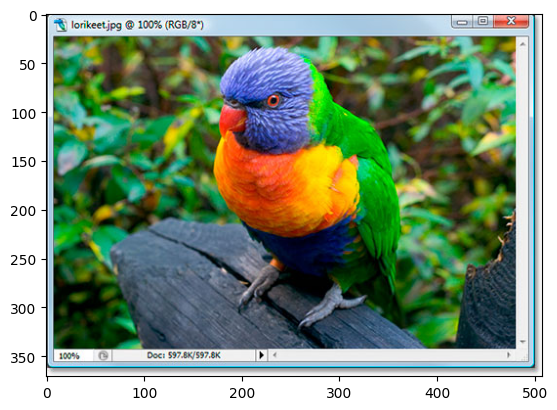

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


(371, 508, 3)

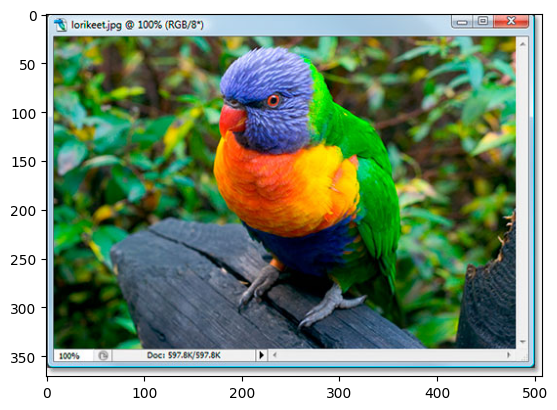

In [ ]:
img_path="/content/rgb.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

In [ ]:
r, g, b = cv2.split(img)
print(r.shape)
print(g.shape)
print(b.shape)
scaler_r = StandardScaler()
scaler_g = StandardScaler()
scaler_b = StandardScaler()

(371, 508)
(371, 508)
(371, 508)


In [ ]:
r_standardized = scaler_r.fit_transform(r)
g_standardized = scaler_g.fit_transform(g)
b_standardized = scaler_b.fit_transform(b)
print(r_standardized.shape)
print(g_standardized.shape)
print(b_standardized.shape)

(371, 508)
(371, 508)
(371, 508)


In [ ]:
cov_r = np.cov(r_standardized, rowvar=False)
cov_g = np.cov(g_standardized, rowvar=False)
cov_b = np.cov(b_standardized, rowvar=False)
print(cov_r.shape)
print(cov_g.shape)
print(cov_b.shape)

(508, 508)
(508, 508)
(508, 508)


In [ ]:
eigvals_r, eigvecs_r = np.linalg.eigh(cov_r)
eigvals_g, eigvecs_g = np.linalg.eigh(cov_g)
eigvals_b, eigvecs_b = np.linalg.eigh(cov_b)
print(eigvals_r[0])
print(eigvecs_r[0])


sorted_indices_r = np.argsort(eigvals_r)[::-1]
sorted_indices_g = np.argsort(eigvals_g)[::-1]
sorted_indices_b = np.argsort(eigvals_b)[::-1]

top_eigenvectors_r = eigvecs_r[:, sorted_indices_r][:, :100]
top_eigenvectors_g = eigvecs_g[:, sorted_indices_g][:, :100]
top_eigenvectors_b = eigvecs_b[:, sorted_indices_b][:, :100]


-9.414422634442975e-15
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  

(371, 100, 3)


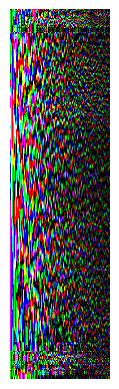

In [ ]:
compressed_r = np.dot(r_standardized, top_eigenvectors_r)
compressed_g = np.dot(g_standardized, top_eigenvectors_g)
compressed_b = np.dot(b_standardized, top_eigenvectors_b)
compressed_image = np.stack((compressed_r, compressed_g, compressed_b), axis=-1)
print(compressed_image.shape)
plt.imshow(compressed_image)
plt.axis('off')
plt.show()



(371, 508, 3)


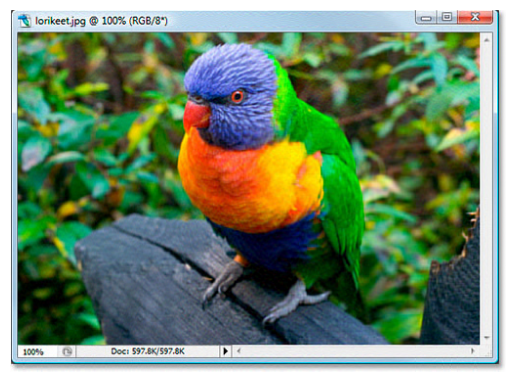

In [ ]:
reconstructed_r = scaler_r.inverse_transform(np.dot(compressed_r, top_eigenvectors_r.T)).reshape(r.shape).clip(0, 255).astype(np.uint8)
reconstructed_g = scaler_g.inverse_transform(np.dot(compressed_g, top_eigenvectors_g.T)).reshape(g.shape).clip(0, 255).astype(np.uint8)
reconstructed_b = scaler_b.inverse_transform(np.dot(compressed_b, top_eigenvectors_b.T)).reshape(b.shape).clip(0, 255).astype(np.uint8)
reconstructed_image = cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)).astype(np.uint8)
print(reconstructed_image.shape)
plt.imshow(reconstructed_image)
plt.axis('off')
plt.show()
